<a href="https://colab.research.google.com/github/Jyoshnagundapu/2216134_AIML_BootCamp/blob/main/Day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data="/content/sample_data/california_housing_train.csv"

In [ ]:
#creating a dataframe
import pandas as pd

In [ ]:
import pandas as pd

df=pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [ ]:
#initialize list elements
data=[0.2,0.4,0.6,0.8]

df=pd.DataFrame(data,columns=['Bacteria_size'])
df['Max_Growth']=[3.4,3.8,4.2,4.6]
df

,Bacteria_size,Max_Growth
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


In [ ]:
#splitting the data
x_train=df.iloc[:3,:-1]
y_train=df.iloc[:3,-1:]
x_test=df.iloc[3:,:-1]
y_test=df.iloc[3:,-1:]

In [ ]:
y_train

,Max_Growth
0,3.4
1,3.8
2,4.2


In [ ]:
x_train

,Bacteria_size
0,0.2
1,0.4
2,0.6


In [ ]:
x_test

,Bacteria_size
3,0.8


In [ ]:
y_test

,Max_Growth
3,4.6


In [ ]:
import sympy as sym
from sympy import *

In [ ]:
#step1:Initialise model parameters
mi=1
ci=-1
n=0.01#learning rate-small
epochs=140

iter=1
ns=len(x_train)

#step2 start iteration
for iter in range(1,epochs+1):
  print("ITERATION:{}".format(iter))
  print("+++++++++++++++++++++++++++++++++++++++++")
#step3 track samples
  for sample in range(0,ns):
    xa = x_train['Bacteria_size'][sample]#0.2
    ya = y_train['Max_Growth'][sample]#3.4
    print("-->Sample {}".format(sample+1)+" x={}".format(xa)+" y={}".format(ya))

    #step4 :Calculate the gradient
    E=(0.5)*(y-m*x-c)**2 #error function
    x=sym.Symbol('x')
    y=sym.Symbol('y')
    m=sym.Symbol('m')
    c=sym.Symbol('c')

    deltaE_m=sym.diff(E,m)
    deltaE_c=sym.diff(E,c)

    #substitue values
    deltaE_m=deltaE_m.subs(m,mi)
    deltaE_m=deltaE_m.subs(c,ci)
    deltaE_m=deltaE_m.subs(x,xa)
    deltaE_m=deltaE_m.subs(y,ya)

    deltaE_c=deltaE_c.subs(m,mi)
    deltaE_c=deltaE_c.subs(c,ci)
    deltaE_c=deltaE_c.subs(x,xa)
    deltaE_c=deltaE_c.subs(y,ya)

    print("Obtained Gradient wrto m and c:")
    print('deltaE_m: ',deltaE_m)
    print('deltaE_c: ',deltaE_c)

    #step5: Calculate steplength-change
    del_m=-n*deltaE_m
    del_c=-n*deltaE_c

    #step 6:Updating model parameters
    mi=mi+del_m
    ci=ci+del_c
    print("m: {}".format(mi)+" c:{}".format(ci))
print("--------------------------------------------")
print("Optimal values")
print('m= {}'.format(mi))
print('c= {}'.format(ci))


ITERATION:1
+++++++++++++++++++++++++++++++++++++++++
-->Sample 1 x=0.2 y=3.4
Obtained Gradient wrto m and c:
deltaE_m:  -0.840000000000000
deltaE_c:  -4.20000000000000
m: 1.00840000000000 c:-0.958000000000000
-->Sample 2 x=0.4 y=3.8
Obtained Gradient wrto m and c:
deltaE_m:  -1.74185600000000
deltaE_c:  -4.35464000000000
m: 1.02581856000000 c:-0.914453600000000
-->Sample 3 x=0.6 y=4.2
Obtained Gradient wrto m and c:
deltaE_m:  -2.69937747840000
deltaE_c:  -4.49896246400000
m: 1.05281233478400 c:-0.869463975360000
ITERATION:2
+++++++++++++++++++++++++++++++++++++++++
-->Sample 1 x=0.2 y=3.4
Obtained Gradient wrto m and c:
deltaE_m:  -0.811780301680640
deltaE_c:  -4.05890150840320
m: 1.06093013780081 c:-0.828874960275968
-->Sample 2 x=0.4 y=3.8
Obtained Gradient wrto m and c:
deltaE_m:  -1.68180116206226
deltaE_c:  -4.20450290515565
m: 1.07774814942143 c:-0.786829931224411
-->Sample 3 x=0.6 y=4.2
Obtained Gradient wrto m and c:
deltaE_m:  -2.60410862494293
deltaE_c:  -4.34018104157155
m

In [ ]:
x_train

,Bacteria_size
0,0.2
1,0.4
2,0.6


In [ ]:
y_train

,Max_Growth
0,3.4
1,3.8
2,4.2


In [ ]:
#y=1.77x+0.99
y_train_pred=[]
for i in range(0,len(x_train)):
  y_cal=mi*x_train['Bacteria_size'][i]+ci
  y_train_pred.append(y_cal)
y_train_pred


[3.30238982119578, 3.79397445249985, 4.28555908380393]

In [ ]:
y_train_list=list(y_train['Max_Growth'])
y_train_list

[3.4, 3.8, 4.2]

In [ ]:
x_train_list=list(x_train['Bacteria_size'])
x_train_list

[0.2, 0.4, 0.6]

In [ ]:
Error=[]
for i in range(0,len(x_train)):
  err=(y_train_list[i]-y_train_pred[i])
  Error.append(err)
Error

[0.0976101788042230, 0.00602554750014539, -0.0855590838039317]

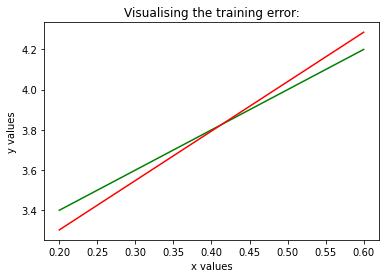

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_train_list,y_train_list,label='y_actual',color='green')
plt.plot(x_train_list,y_train_pred,label='y_predicted',color='red')

#Add labels and title
plt.title("Visualising the training error:")
plt.xlabel("x values")
plt.ylabel("y values")

plt.show()